## Homework 4- Task 3: Air Quality Index Data + False Color Image
Author: Hazel Vaquero

Repository link: https://github.com/hazelvaq/eds220-mpc.git 

## About
In this notebook we create a time series showing Averaged Air Quaility Index(AQI) for Santa Barbara in 2017 to observe the affects of the Thomas Fire. As well as creating a raster map of Santa Barbara fire scar from the Thomas Fire.

#### Highlights
- Fetch vector data from online repository
- Data wrangling with `pandas`
- Time series analysis with `matplotlib`
- Raster wrangling with `rioxarray`

### About the Datasets
In this notebook we use 3 different data sets.

#### AQI Time series Data
**1) [EPA's Air Quality Data Collected at Outdoor Monitor Stations](https://www.epa.gov/outdoor-air-quality-data)**

The first dataset contains information on daily AQI readings across the United States. AQI readings are an indicator that allow the public to understand how polluted their air is. AQI is divided into 6 categories: 
 - Good 
 - Moderate 
 - Unhealthy for Sensetive Groups
 - Unhealthy 
 - Very Unhealthy
 - Hazardous

Higher levels in AQI translate to more pollution present in the atmosphere. 

This dataset has been download from the [EPA's Air Quality System (AQS)](https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI) as a datset. We are interested in 2017 and 2018 Daily AQI by county data. It has 10 columns recording information about the state name, date recorded, AQI, AQI category, and county name. For this analysis we will use the following columns:
- **County name**: County where AQI levels were measured
- **AQI**: air quality measure reported (based on PM2.5 present in the atmosphere)

Additional information and metadata for this datset is available in the [Airdata Download Files Documentation](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html)

#### Thomas Fire Scar Data
**2) [California Fire Perimeter](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about)**

This is a shapefile of California wildfires from 1878 to 2022. The data is updated annually in the spring with the fire perimeters from the previous fire season. As noted by The State of California and the Department of Forestry and Fire Protection this data provides a spatial distribution of the past large fires in California. But, this data is in no way a complete potral of the past fires. There are historical data missing,  



### Analysis

The necessary libraries for this task are the following

In [2]:
# read in pandas
import pandas as pd
# import matplotlib for colors
import matplotlib.pyplot as plt 

We are interested in `daily_aqi_by_county_2017.zip` and `daily_aqi_by_county_2018.zip`. Using the url above we import our data.

In [12]:
# read in 2017 Daily AQI by County data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")

# read in 2018 Daily AQI by County data
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

aqi_17

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
326796,Wyoming,Weston,56,45,2017-12-27,39,Good,Ozone,56-045-0003,1
326797,Wyoming,Weston,56,45,2017-12-28,36,Good,Ozone,56-045-0003,1
326798,Wyoming,Weston,56,45,2017-12-29,31,Good,Ozone,56-045-0003,1
326799,Wyoming,Weston,56,45,2017-12-30,31,Good,Ozone,56-045-0003,1


We have two seperate dataframes, we should combine them for our analysis

In [3]:
# "Glue" aqi_17 and aqi_18
aqi = pd.concat([aqi_17,aqi_18])

Let us view our newly combined dataframe!

In [4]:
aqi.head(3)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1


Some things to note:

1. The column names start with an upper case
2. There is a blank space in the column names

Before we continue our analysis we should update the column names in a more programmer friendly manner. Update the column names to be lower case and replace the blank space with `_`


In [5]:
# Update column by making lower case and replace space with underscore
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# View our updates
aqi.head(2)

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1


Our current dataframe includes all Counties in the United States. But, we are only interested in Santa Barbara. Let's filter our dataframe to Santa Barbara County

In [6]:
# Select Santa Barbara
aqi_sb = aqi[aqi.county_name == "Santa Barbara"]

# Check that we only filtered for Santa Barbara by unique county_names
aqi_sb.county_name.unique()

array(['Santa Barbara'], dtype=object)

Now that we filtered our dataset to just Santa Barbara let's do further analysis on our dataset - view column data types.



In [7]:
# check data types of columns
aqi_sb.dtypes

state_name                   object
county_name                  object
state_code                    int64
county_code                   int64
date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

Notice that our `date` column is an object. Let's change that to a `datetime64`. And update our `date` column to be the index.

In [8]:
# update date column to be datetime object
aqi_sb.loc[:,'date'] = pd.to_datetime(aqi_sb['date'])

print(aqi_sb.dtypes)

aqi_sb = aqi_sb.set_index("date")

# View index change
print(aqi_sb.index)

state_name                           object
county_name                          object
state_code                            int64
county_code                           int64
date                         datetime64[ns]
aqi                                   int64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)


/tmp/ipykernel_1319159/4016207549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_sb.loc[:,'date'] = pd.to_datetime(aqi_sb['date'])


To further update this dataset let us remove the columns we are not interested in, removing `state_name`,`county_name`, `state_code`, `county_code`

In [9]:
# remove state_name, county_name, state_code and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

# View remaining columns
aqi_sb.columns

Index(['aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')

To calculate the trend of AQI values we conduct a 5-day rolling average.

In [10]:
# Create a new column with mean AQI over a 5-day rolling average.
#aqi_sb["five_day_average"] = aqi_sb.aqi.rolling("5D").mean()

aqi_sb["five_day_average"] = aqi_sb.aqi.rolling("5D").mean()

Now we can make a line plot of our time series! Let us compare both the daily AQI and 5-day moving average.

<AxesSubplot:title={'center':'Daily AQI and 5-day average AQI for Santa Barbara'}, xlabel='Date', ylabel='PM2.5 (μm)'>

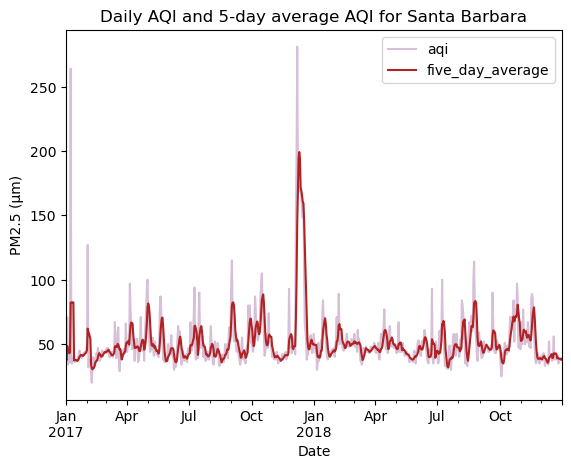

In [11]:
# define colors for plot
colors = ['thistle','firebrick']

# line plot of daily AQI and the 5-day average 
aqi_sb.plot(y = ['aqi','five_day_average'], # setting y as AQI and 5-day average AQI
           xlabel = "Date", # x-axis label
           ylabel = "PM2.5 (μm)", #y-axis label
           title = "Daily AQI and 5-day average AQI for Santa Barbara", # title 
           color = colors) #setting colors for lines